In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/MyDrive/task2

/content/drive/.shortcut-targets-by-id/1yGzdmHEHyaYLbhXN7DWLnUEPwhnfa2X_/task2


In [24]:
import os
import torch
import torchvision
import numpy as np
import pandas as pd
from PIL import Image
from torch import optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch.nn as nn


%matplotlib inline

In [18]:
%cd /content/drive/MyDrive/task2

/content/drive/.shortcut-targets-by-id/1yGzdmHEHyaYLbhXN7DWLnUEPwhnfa2X_/task2


In [22]:
DATASET_PATH = "data/"
df = pd.read_csv(os.path.join(DATASET_PATH, "styles.csv"), error_bad_lines=False) # neglect lines with error

<ipython-input-22-76bafdf7865f>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(os.path.join(DATASET_PATH, "styles.csv"), error_bad_lines=False) # neglect lines with error
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11


In [26]:
len(os.listdir("/content/drive/MyDrive/task2/data/images"))

44399

In [27]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [28]:
print("Number of categories:", len(df['articleType'].value_counts()))

Number of categories: 143


<Axes: >

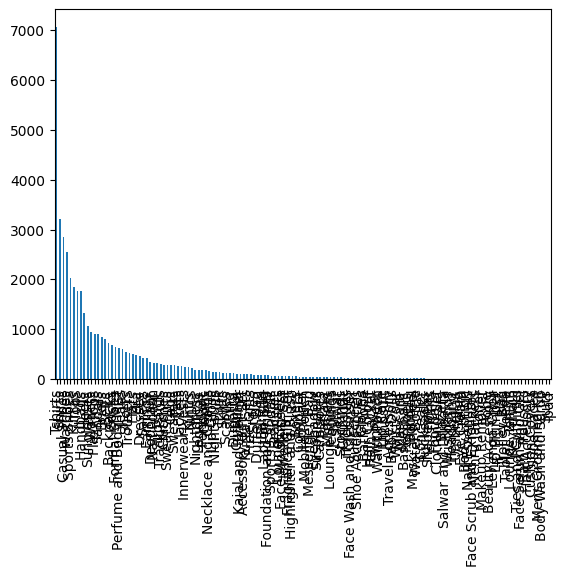

In [29]:
df['articleType'].value_counts().plot(kind='bar')

In [30]:
# Clean unexisting files
problems = []
for idx, line in df.iterrows():
    if not os.path.exists(os.path.join(DATASET_PATH, 'images', str(line.id)+'.jpg')):
        print(idx)
        problems.append(idx)
df.drop(df.index[problems], inplace=True)

2253
4572
5613
6094
6446
6662
6695
7132
7292
8128
8349
8985
9336
9374
9718
10240
10523
10787
11499
12329
12517
13012
14235
14399
14612
16194
16449
27765
28256
28281
28563
29007
30426
30855
30949
31337
31706
32229
32309
33532
33704
36381
36392
36936
37214
37678
40000


In [31]:
category_counts = df['articleType'].value_counts()

In [32]:
filtered_df = df[df['articleType'].isin(category_counts[category_counts > 1000].index)]


In [33]:
filtered_df['articleType'].value_counts()

Tshirts         7046
Shirts          3206
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: articleType, dtype: int64

<Axes: >

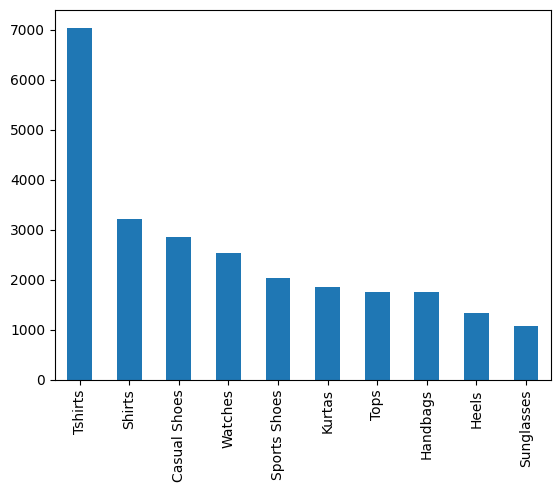

In [34]:
# Distribution of our filtered classes
filtered_df['articleType'].value_counts().plot(kind='bar')

In [35]:
print("Number of classes after filteration:",len(filtered_df['articleType'].unique()))

Number of classes after filteration: 10


In [36]:
# Split train and test dataset
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=2028)

In [37]:
print("Train Test")
print(len(train_df),len(test_df))

Train Test
20348 5088


In [38]:
train_df['articleType'].value_counts()

Tshirts         5647
Shirts          2576
Casual Shoes    2290
Watches         2032
Sports Shoes    1634
Kurtas          1454
Tops            1404
Handbags        1391
Heels           1058
Sunglasses       862
Name: articleType, dtype: int64